Graph with 46 nodes and 0 edges


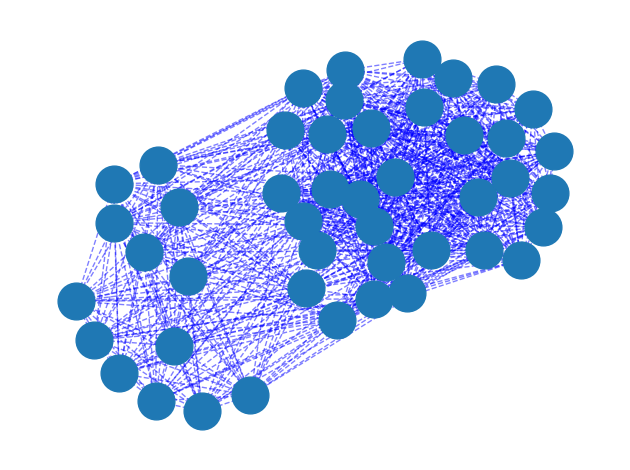

In [23]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:

dados_para_conversao_urbano = pd.read_excel('salvador_microregiao.xlsx', sheet_name=0)
dados_para_conversao_rural = pd.read_excel('salvador_microregiao.xlsx', sheet_name=1)

frames = [dados_para_conversao_rural]

nodes = pd.concat(frames)

arestas = []
G = nx.Graph()
for (index, item) in nodes.iterrows():
    G.add_node(item['Código da Escola'])

In [ ]:
for (index, item) in nodes.iterrows():
    for index, item2 in nodes.iterrows():
        quantidade_de_associacoes = []
        
        if(item['Código da Escola'] != item2['Código da Escola']):
            if(item['IDEB'] == item2['IDEB']):
                quantidade_de_associacoes.append('ideb')
            elif(item['Subgrupo'] == item2['Subgrupo']):
                quantidade_de_associacoes.append('Subgrupo')
            elif(item['Atingiu ou não a projeção?'] == item2['Atingiu ou não a projeção?']):
                quantidade_de_associacoes.append('projecao')

        if(len(quantidade_de_associacoes) != 0):
            
            e = [(item[0], item2[0], len(quantidade_de_associacoes)/4)]
            G.add_weighted_edges_from(e)

In [ ]:

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=1)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=1, alpha=0.5, edge_color="b", style="dashed"
)


ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

nx.write_gexf(G, 'item.gexf', encoding='utf-8', prettyprint=True, version='1.2draft')